In [36]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import requests
import pickle
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

Handeling the data
===

In [ ]:
url = "https://api.binance.com"
stable_coins = ["USDT"]
# Other possible stablecoins: USD1, USDP, BFUSD, USDE,"USDC", "BUSD", "TUSD", "FDUSD",'DAI'

# 1. Get all trading symbols
exchange_info = requests.get(f"{url}/api/v3/exchangeInfo").json()

symbol_pairs = set()
for s in exchange_info["symbols"]:
    if s["status"] == "TRADING" and s["isSpotTradingAllowed"]:
        if s["quoteAsset"] in stable_coins:
            symbol_pairs.add(s["symbol"])
print(f"Total symbols: {len(symbol_pairs)}")

with open(f'/local/scratch/yuzhang_utxo/token_price/all_tokens_name.csv','wb') as f:
    pickle.dump(symbol_pairs,f)

# with open(f'/local/scratch/yuzhang_utxo/token_price/all_tokens_name.csv','rb') as f:
#     symbol_pairs=pickle.load(f)

Total symbols: 441


Extracting coins' listing time on Binance
===

In [30]:
from glob import glob
from datetime import datetime

file = '/local/scratch/yuzhang_utxo/token_price'
files = glob(file+'/*_minute_price.csv')
print(len(files))

token_list_time = dict()
# for f in files:
#     symbol = f.split("/")[-1].split("_")[0]
#     tp = pd.read_csv(f,header=0)
#     timestamp = int(tp.loc[0][1]/1000)
#     dt = datetime.fromtimestamp(timestamp)
#     token_list_time[symbol]=dt

# with open(file+'/all_tokens_listing_time.csv','wb') as f:
#     pickle.dump(token_list_time,f)

with open(file+'/all_tokens_listing_time.csv','rb') as f:
    token_list_time = pickle.load(f)

print(token_list_time)

441
{'ENSUSDT': datetime.datetime(2021, 11, 10, 7, 0), 'KERNELUSDT': datetime.datetime(2025, 4, 14, 12, 0), 'MAVUSDT': datetime.datetime(2023, 6, 28, 8, 0), 'TONUSDT': datetime.datetime(2024, 8, 8, 10, 0), 'MTLUSDT': datetime.datetime(2019, 8, 23, 10, 0), 'DOLOUSDT': datetime.datetime(2025, 8, 27, 16, 0), 'VANAUSDT': datetime.datetime(2024, 12, 16, 11, 30), 'XTZUSDT': datetime.datetime(2019, 9, 24, 11, 0), 'INJUSDT': datetime.datetime(2020, 10, 21, 4, 0), 'CTKUSDT': datetime.datetime(2020, 10, 27, 8, 0), 'HOMEUSDT': datetime.datetime(2025, 6, 12, 15, 0), 'DYDXUSDT': datetime.datetime(2021, 9, 9, 2, 0), 'FDUSDUSDT': datetime.datetime(2023, 7, 26, 8, 0), 'EDUUSDT': datetime.datetime(2023, 4, 28, 12, 0), 'ACEUSDT': datetime.datetime(2023, 12, 18, 6, 0), '2ZUSDT': datetime.datetime(2025, 10, 2, 13, 0), 'ATAUSDT': datetime.datetime(2021, 6, 7, 6, 0), 'GMTUSDT': datetime.datetime(2022, 3, 9, 12, 0), 'KGSTUSDT': datetime.datetime(2025, 12, 24, 8, 0), 'AEURUSDT': datetime.datetime(2023, 12, 4,

In [ ]:
date_tokens = dict()
date_tokens_num = dict()
for k,v in token_list_time.items():
    date_str = v.strftime('%Y-%m-%d')
    token_list_time[k] = date_str
    if date_str not in date_tokens:
        date_tokens[date_str] = [k]
        date_tokens_num[date_str] = 1
    else:
        date_tokens[date_str] = date_tokens[date_str]+[k]
        date_tokens_num[date_str] = date_tokens_num[date_str]+1

print(token_list_time)

sorted_date_tokens_num = dict(sorted(date_tokens_num.items()))

listing_date = sorted_date_tokens_num.keys()
listing_token_num = sorted_date_tokens_num.values()
print(listing_date)

{'ENSUSDT': '2021-11-10', 'KERNELUSDT': '2025-04-14', 'MAVUSDT': '2023-06-28', 'TONUSDT': '2024-08-08', 'MTLUSDT': '2019-08-23', 'DOLOUSDT': '2025-08-27', 'VANAUSDT': '2024-12-16', 'XTZUSDT': '2019-09-24', 'INJUSDT': '2020-10-21', 'CTKUSDT': '2020-10-27', 'HOMEUSDT': '2025-06-12', 'DYDXUSDT': '2021-09-09', 'FDUSDUSDT': '2023-07-26', 'EDUUSDT': '2023-04-28', 'ACEUSDT': '2023-12-18', '2ZUSDT': '2025-10-02', 'ATAUSDT': '2021-06-07', 'GMTUSDT': '2022-03-09', 'KGSTUSDT': '2025-12-24', 'AEURUSDT': '2023-12-04', 'PONDUSDT': '2021-03-09', 'OGNUSDT': '2020-01-09', 'NEOUSDT': '2017-11-20', 'A2ZUSDT': '2025-07-30', 'TRUUSDT': '2021-01-19', 'IOTXUSDT': '2019-11-14', 'USDEUSDT': '2025-09-09', 'ICXUSDT': '2018-06-13', 'ZRXUSDT': '2019-02-28', 'AUDIOUSDT': '2020-10-23', 'QNTUSDT': '2021-07-29', 'QKCUSDT': '2023-03-17', 'DIAUSDT': '2020-09-04', 'CELRUSDT': '2019-03-25', 'CVCUSDT': '2019-08-27', 'PROMUSDT': '2023-03-17', 'SOMIUSDT': '2025-09-02', 'ETHUSDT': '2017-08-17', 'WALUSDT': '2025-10-10', 'KITEU

DatetimeIndex(['2017-08-17', '2017-09-16', '2017-10-16', '2017-11-15',
               '2017-12-15', '2018-01-14', '2018-02-13', '2018-03-15',
               '2018-04-14', '2018-05-14',
               ...
               '2025-05-07', '2025-06-06', '2025-07-06', '2025-08-05',
               '2025-09-04', '2025-10-04', '2025-11-03', '2025-12-03',
               '2026-01-02', '2026-02-01'],
              dtype='datetime64[ns]', length=104, freq='30D')


ConversionError: Failed to convert value(s) to axis units: DatetimeIndex(['2017-08-17', '2017-09-16', '2017-10-16', '2017-11-15',
               '2017-12-15', '2018-01-14', '2018-02-13', '2018-03-15',
               '2018-04-14', '2018-05-14',
               ...
               '2025-05-07', '2025-06-06', '2025-07-06', '2025-08-05',
               '2025-09-04', '2025-10-04', '2025-11-03', '2025-12-03',
               '2026-01-02', '2026-02-01'],
              dtype='datetime64[ns]', length=104, freq='30D')

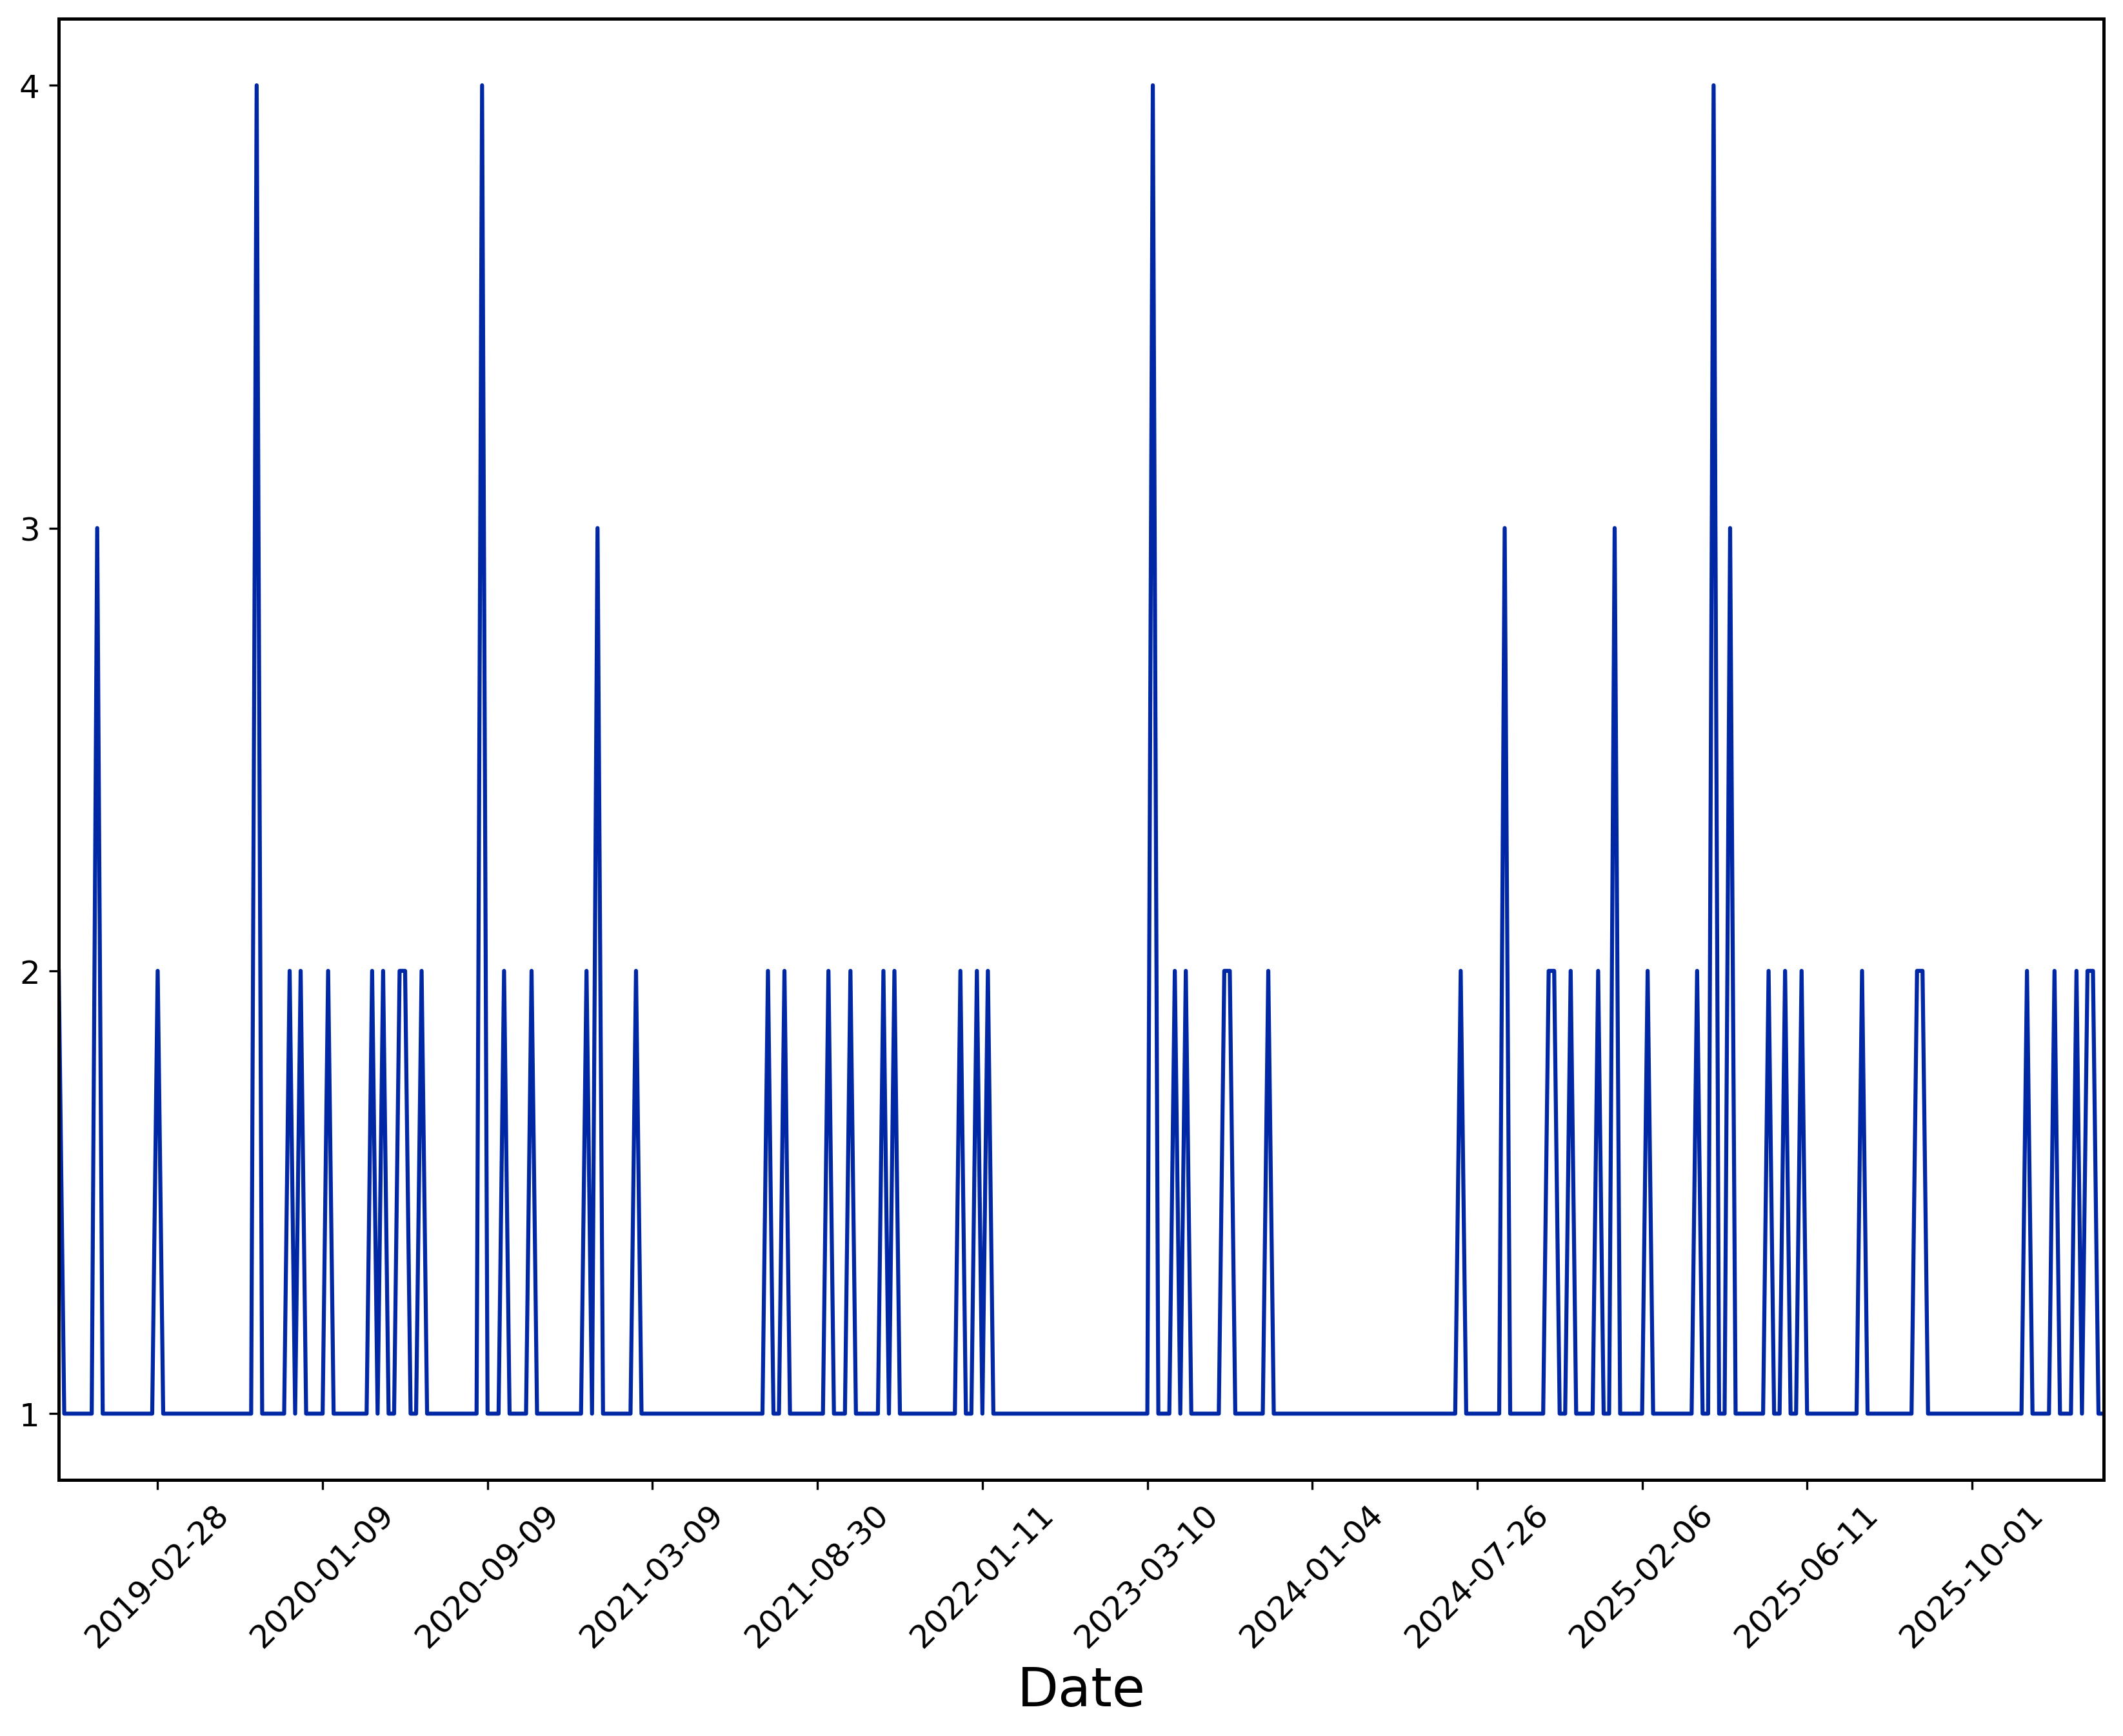

In [ ]:
listing_date = np.array([k for k,v in sorted_date_tokens_num.items()])
listing_token_num = np.array([v for k,v in sorted_date_tokens_num.items()])
listing_token_num_sum = np.cumsum(listing_token_num)

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(30,10))

ticks = pd.date_range(start=pd.to_datetime(listing_date[0]), end=pd.to_datetime(listing_date[-1]), freq="30D")

ax1 = plt.subplot(121)
ax1.plot(listing_date,listing_token_num)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlim(listing_date[0], listing_date[-1])
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('Date',size=20)
ax1.set_xticks(ticks)
ax1.set_title('Listed Coins per Day',size=20)

ax2 = plt.subplot(122)
ax2.plot(listing_date,listing_token_num_sum)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_xlim(listing_date[0], listing_date[-1])
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlabel('Date',size=20)
ax2.set_xticks(ticks)
ax2.set_title('Cumulative Number of Listed Coins',size=20)

plt.show()

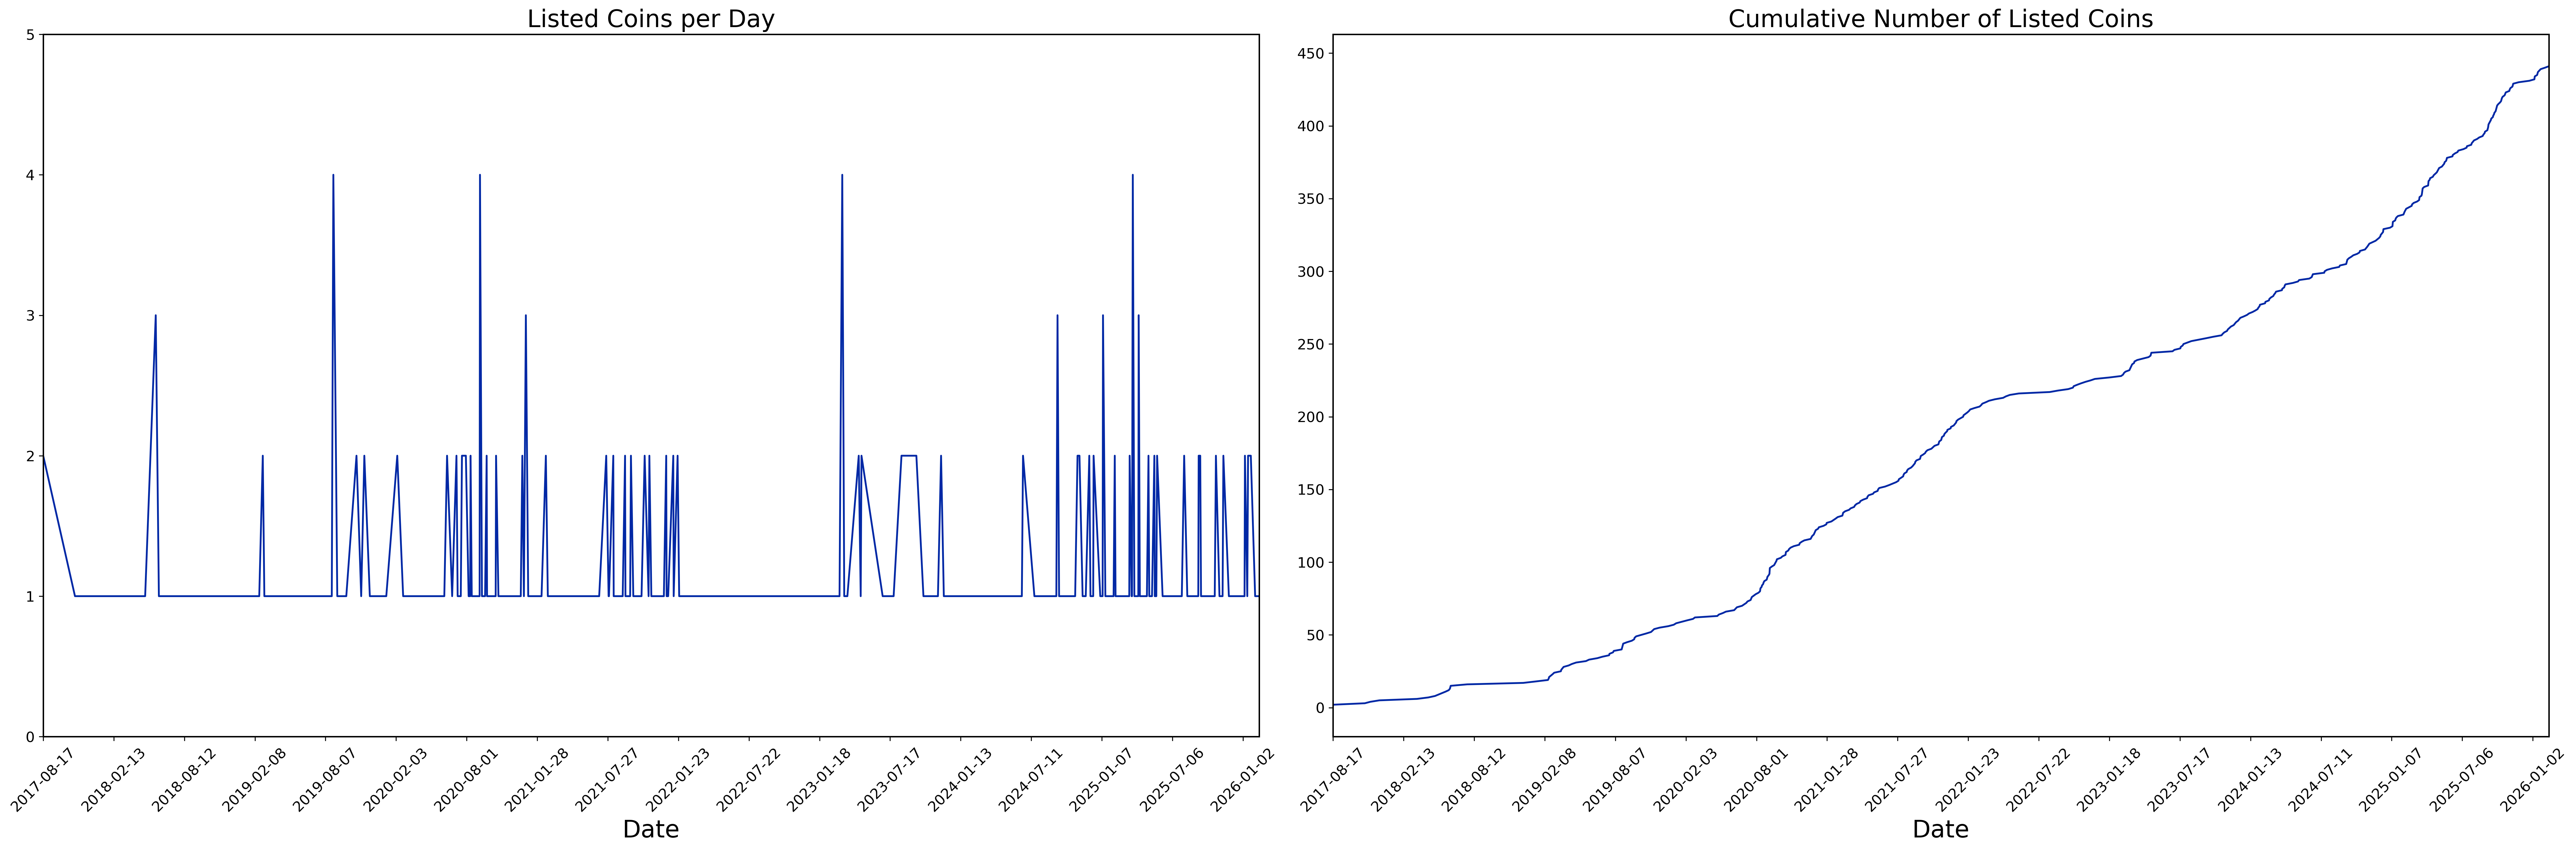

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

listing_date = np.array([k for k,v in sorted_date_tokens_num.items()])
# Convert listing_date (string) to datetime
listing_date = pd.to_datetime(listing_date)

listing_token_num = np.array([v for k, v in sorted_date_tokens_num.items()])
listing_token_num_sum = np.cumsum(listing_token_num)

fig = plt.figure(figsize=(30, 10))

# Create ticks from min to max date every 30 days
min_date = listing_date.min()
max_date = listing_date.max()
ticks = pd.date_range(start=min_date, end=max_date, freq="180D")

# Formatter
date_fmt = mdates.DateFormatter('%Y-%m-%d')

# -------- Plot 1 --------
ax1 = plt.subplot(121)
ax1.plot(listing_date, listing_token_num)

ax1.set_xticks(ticks)
ax1.set_xlim(min_date, max_date)
ax1.xaxis.set_major_formatter(date_fmt)

ax1.tick_params(axis='x', labelrotation=45)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_xlabel('Date', size=20)
ax1.set_title('Listed Coins per Day', size=20)
ax1.set_ylim(0,5)

# -------- Plot 2 --------
ax2 = plt.subplot(122)
ax2.plot(listing_date, listing_token_num_sum)

ax2.set_xticks(ticks)
ax2.set_xlim(min_date, max_date)
ax2.xaxis.set_major_formatter(date_fmt)

ax2.tick_params(axis='x', labelrotation=45)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

ax2.set_xlabel('Date', size=20)
ax2.set_title('Cumulative Number of Listed Coins', size=20)

plt.tight_layout()
plt.show()